## HW9 statsmodels OLS and WLS
#### Author: Xiao Jing


In [35]:
from __future__ import print_function, division
import pylab as pl

import os
import json
import numpy as np
import pandas as pd
import seaborn

import statsmodels.api as sm
import statsmodels.formula.api as smf
s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

%pylab inline

TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

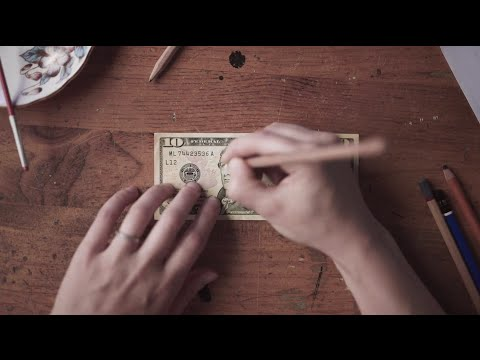

In [36]:
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

In [37]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

Text(0.5,1,'Errorbar')

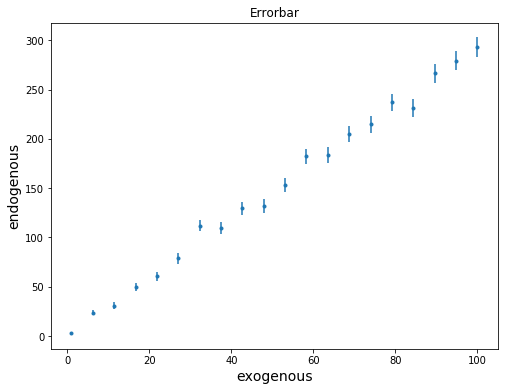

In [54]:
x=np.linspace(1,100,20)
y = line(3,x,0,errors=errors)
figure = pl.figure(figsize=(8,6))
pl.errorbar(x, y, yerr=errors(x),linestyle='None',fmt='.')
pl.xlabel('exogenous',fontsize=14)
pl.ylabel('endogenous',fontsize=14)
pl.title('Errorbar')

Caption: The errorbar plot is the function 'y=3x + uncertainty sqrt(x)'. The error bars longer when the number x larger.

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [42]:
print(x)

[  1.           6.21052632  11.42105263  16.63157895  21.84210526
  27.05263158  32.26315789  37.47368421  42.68421053  47.89473684
  53.10526316  58.31578947  63.52631579  68.73684211  73.94736842
  79.15789474  84.36842105  89.57894737  94.78947368 100.        ]


In [43]:
x_n = sm.add_constant(x)
print(x_n)
print(y)

[[  1.           1.        ]
 [  1.           6.21052632]
 [  1.          11.42105263]
 [  1.          16.63157895]
 [  1.          21.84210526]
 [  1.          27.05263158]
 [  1.          32.26315789]
 [  1.          37.47368421]
 [  1.          42.68421053]
 [  1.          47.89473684]
 [  1.          53.10526316]
 [  1.          58.31578947]
 [  1.          63.52631579]
 [  1.          68.73684211]
 [  1.          73.94736842]
 [  1.          79.15789474]
 [  1.          84.36842105]
 [  1.          89.57894737]
 [  1.          94.78947368]
 [  1.         100.        ]]
[  3.71085898  17.97229145  36.97864376  42.79549231  65.17966292
  78.41187794  98.14950281 113.39201369 133.49361157 156.04497586
 159.53668126 170.39611778 189.49714581 207.92885183 232.46918213
 227.23318392 244.59385769 269.36522994 285.97721303 293.98711043]


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [51]:
#THE WRONG WAY
smfit_w = smf.OLS(y, x).fit()
smfit_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.955e+04
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           4.32e-30
Time:                        20:33:12   Log-Likelihood:                -62.399
No. Observations:                  20   AIC:                             126.8
Df Residuals:                      19   BIC:                             127.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.9912      0.021    139.824      0.000       2.946       3.036
==============================================================================
Omnibus:                        1.539   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.463   Jarque-Bera (JB):                0.601
Skew:                           0.412   Prob(JB):                        0.741
Kurtosis:                       3.208   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#THE RIGHT WAY
smfit = smf.OLS(y, x_n).fit()
smfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     4844.
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           2.43e-23
Time:                        20:28:23   Log-Likelihood:                -62.284
No. Observations:                  20   AIC:                             128.6
Df Residuals:                      18   BIC:                             130.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1470      2.511      0.457      0.653      -4.129       6.423
x1             2.9744      0.043     69.596      0.000       2.885       3.064
==============================================================================
Omnibus:                        2.049   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.359   Jarque-Bera (JB):                0.936
Skew:                           0.516   Prob(JB):                        0.626
Kurtosis:                       3.240   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. plot the data (as points) and both statsmodels fits

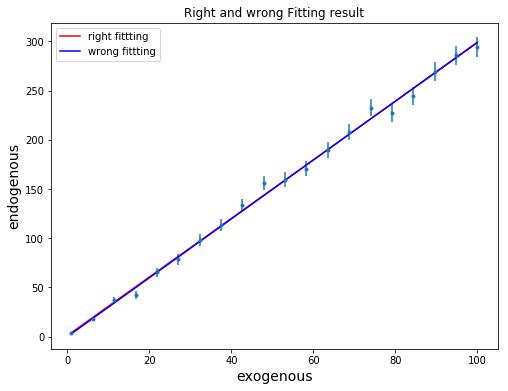

In [53]:
figure = pl.figure(figsize=(8,6))
pl.errorbar(x, y, yerr=errors(x),linestyle='None',fmt='.')
pl.plot(x,smfit.predict(x_n),color='r',label='right fittting')
pl.plot(x,smfit_w.predict(x),color='b',label='wrong fittting')
pl.xlabel('exogenous',fontsize=14)
pl.ylabel('endogenous',fontsize=14)
pl.title('Right and wrong Fitting result')
pl.legend()

The right fitting considers the intercept part and slightly different from the wronh fittinh in the first several number x.

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

Text(0.5,1,'Errorbar')

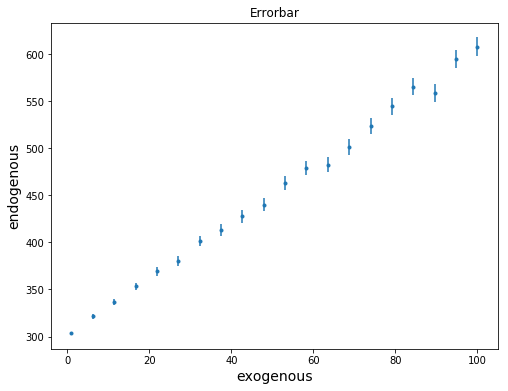

In [55]:
x=np.linspace(1,100,20)
slope = 3
y = line(slope,x,slope*100+1,errors=errors)
figure = pl.figure(figsize=(8,6))
pl.errorbar(x, y, yerr=errors(x),linestyle='None',fmt='.')
pl.xlabel('exogenous',fontsize=14)
pl.ylabel('endogenous',fontsize=14)
pl.title('Errorbar')

# 6. repeat step 3

In [56]:
#THE WRONG WAY
smfit_w = smf.OLS(y, x).fit()
smfit_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     152.6
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           1.58e-10
Time:                        20:38:24   Log-Likelihood:                -129.09
No. Observations:                  20   AIC:                             260.2
Df Residuals:                      19   BIC:                             261.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             7.4191      0.601     12.354      0.000       6.162       8.676
==============================================================================
Omnibus:                        3.147   Durbin-Watson:                   0.023
Prob(Omnibus):                  0.207   Jarque-Bera (JB):                1.257
Skew:                           0.031   Prob(JB):                        0.533
Kurtosis:                       1.773   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
x_n = sm.add_constant(x)
print(x_n)
print(y)

[[  1.           1.        ]
 [  1.           6.21052632]
 [  1.          11.42105263]
 [  1.          16.63157895]
 [  1.          21.84210526]
 [  1.          27.05263158]
 [  1.          32.26315789]
 [  1.          37.47368421]
 [  1.          42.68421053]
 [  1.          47.89473684]
 [  1.          53.10526316]
 [  1.          58.31578947]
 [  1.          63.52631579]
 [  1.          68.73684211]
 [  1.          73.94736842]
 [  1.          79.15789474]
 [  1.          84.36842105]
 [  1.          89.57894737]
 [  1.          94.78947368]
 [  1.         100.        ]]
[303.71026326 321.27204347 336.96842964 353.19508758 369.21813037
 380.37543772 401.2559011  412.83640501 427.42638326 440.03733781
 462.64448551 478.68789106 482.33817992 500.94167055 523.70453419
 544.36876647 565.26808084 558.65012959 594.8914775  607.4917345 ]


In [58]:
#THE RIGHT WAY
smfit = smf.OLS(y, x_n).fit()
smfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     5023.
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           1.75e-23
Time:                        20:39:02   Log-Likelihood:                -62.238
No. Observations:                  20   AIC:                             128.5
Df Residuals:                      18   BIC:                             130.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        300.6428      2.506    119.986      0.000     295.379     305.907
x1             3.0222      0.043     70.876      0.000       2.933       3.112
==============================================================================
Omnibus:                        2.568   Durbin-Watson:                   2.219
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.434
Skew:                          -0.652   Prob(JB):                        0.488
Kurtosis:                       3.134   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [72]:
wlsmod=sm.WLS(y,x_n,weights=1/x).fit()
wlsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            WLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.386e+04
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           1.93e-27
Time:                        21:00:44   Log-Likelihood:                -56.094
No. Observations:                  20   AIC:                             116.2
Df Residuals:                      18   BIC:                             118.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        301.0711      0.637    472.355      0.000     299.732     302.410
x1             3.0137      0.026    117.719      0.000       2.960       3.068
==============================================================================
Omnibus:                        1.682   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.431   Jarque-Bera (JB):                1.432
Skew:                          -0.543   Prob(JB):                        0.489
Kurtosis:                       2.265   Cond. No.                         28.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R^2 increased when the weight of x with larger error decreases.

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

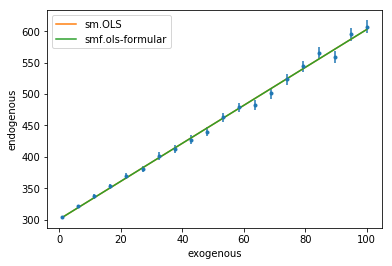

In [76]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfit.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols-formular")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();